# CCIC HACKATHON 
# Dark_n8_dee9

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
risk = pd.read_csv('/home/shreemoyee/Downloads/private-dataset/hackathon_payment_risk_data.csv', encoding = "ISO-8859-1")
h_all = pd.read_csv('/home/shreemoyee/Downloads/private-dataset/hackathon_private_leader_board_data.csv', encoding = "ISO-8859-1")
stat = pd.read_csv('/home/shreemoyee/Downloads/private-dataset/hackathon_statement_data.csv', encoding = "ISO-8859-1")

In [21]:
h_all['type_name'].value_counts()

PURCHASE         176365
PAYMENT           26346
REBATE REFUND        56
Name: type_name, dtype: int64

### DATA CLEANING  

In [28]:
stat = stat.drop_duplicates().reset_index()

In [29]:
sum(h_all[h_all['type_name']=='PAYMENT']['payment_channel_desc'].isnull())

0

In [30]:
h_all['payment_channel_desc'] = h_all['payment_channel_desc'].replace('PAY BY PHONE +\x82 SAWGRASS SINGLE PAYMENT', 'PAY BY PHONE ¶ SAWGRASS SINGLE PAYMENT')
h_all['payment_channel_desc'] = h_all['payment_channel_desc'].replace('PAY BY PHONE +\x82 CUSTOMER SERVICE SINGLE PAYMENT', 'PAY BY PHONE ¶ CUSTOMER SERVICE SINGLE PAYMENT')
h_all['payment_channel_desc'] = h_all['payment_channel_desc'].replace('PAY BY PHONE +\x82 COLLECTIONS RECURRING FIXED WITH MIN DUE PAYMENT', 'PAY BY PHONE ¶ COLLECTIONS RECURRING FIXED WITH MIN DUE PAYMENT')
h_all['payment_channel_desc'] = h_all['payment_channel_desc'].replace('PAY BY PHONE +\x82 COLLECTIONS RECURRING MINIMUM DUE PAYMENT', 'PAY BY PHONE ¶ COLLECTIONS RECURRING MINIMUM DUE PAYMENT')
h_all['payment_channel_desc'] = h_all['payment_channel_desc'].replace('PAY BY PHONE +\x82 COLLECTIONS RECURRING MINIMUM DUE PLUS PAYMENT', 'PAY BY PHONE ¶ COLLECTIONS RECURRING MINIMUM DUE PLUS PAYMENT')
h_all['payment_channel_desc'] = h_all['payment_channel_desc'].replace('PAY BY PHONE +\x82 COLLECTIONS SINGLE PAYMENT', 'PAY BY PHONE ¶ COLLECTIONS SINGLE PAYMENT')
h_all['payment_channel_desc'] = h_all['payment_channel_desc'].replace('PAY BY PHONE +\x82 CUSTOMER SERVICE IVR SINGLE PAYMENT', 'PAY BY PHONE ¶ CUSTOMER SERVICE IVR SINGLE PAYMENT')



In [31]:
h_all['payment_channel_desc'] = h_all['payment_channel_desc'].fillna('None')
h_all = h_all.groupby(['card number', 'date', 'type_name', 'payment_channel_desc']).agg({'amountINR':'sum'}).reset_index()

In [32]:
print(stat.shape)
print(h_all.shape)

(7332, 6)
(95248, 5)


In [33]:
stat['billingStartDate']=pd.to_datetime(stat['billingStartDate'])
stat['billingEndDate']=pd.to_datetime(stat['billingEndDate'])

In [34]:
h_all['date'] = pd.to_datetime(h_all['date'])

In [50]:
len((stat['card Number']).unique())

1113

In [35]:
h_all = h_all[h_all['amountINR']>0]
h_all.shape

(95206, 5)

### UPDATED RISK CALCULATION 

1. Payment channels of similar type were grouped into single category due  which the number of payment channels reduced from 54 to 14.
2. The updated risk rating values were calculated for these categories using the given ratings and the number of times each payment channel was used. 
3. This is because a payment_channel used more often will be less risky. 
 


In [36]:
  dict1 =      {'AUTOPAY PAYMENT' : 'AUTOPAY',
       'AUTOPAY CBOL (BRANDS ONLY)': 'AUTOPAY',
       'AUTOPAY COLLECTIONS (BRANDS ONLY)': 'AUTOPAY',
       'AUTOPAY CUSTOMER SERVICE (BRANDS ONLY)': 'AUTOPAY',
       'AUTOPAY PAPER FORM (BRANDS ONLY)': 'AUTOPAY', 'OFFUS CHECKS ONLY PAYMENT':'CHECKS1',
 'ONUS CHECKS ONLY PAYMENT':'CHECKS1',
       'MIXTURE OF ONUS AND OFFUS CHECKS':'CHECKS1',
'Cash Payment':'CASH',
       'CASH ONLY PAYMENT':'CASH',
             'MIXTURE OF ONUS CHECKS AND CASH':'CASH',
       'MIXTURE OF OFFUS CHECKS AND CASH':'CASH',
       'MIXTURE OF ONUS CHECKS, OFFUS CHECKS AND CASH':'CASH',
  'EXTERNAL CASH (ATM PAYMENTS)':'CASH',
          'BRANCH PAYMENT GTPS TRANSFER' :'BRANCH TRANSFER',
        'BRANCH PAYMENT NIVR TRANSFER' :'BRANCH TRANSFER',
    'BRANCH PAYMENT MOBILE TRANSFER' :'BRANCH TRANSFER',
        'BRANCH PAYMENT CBOL TRANSFER' :'BRANCH TRANSFER',



      
        'COPS RECURRING MINIMUM DUE PAYMENT' : 'COPS',
        'COPS RECURRING MINIMUM DUE PLUS PAYMENT' : 'COPS',


        'COLLECTIONS ONLINE SINGLE PAYMENT' : 'ONLINE',
        'CLICK TO PAY PAYMENT' : 'ONLINE',


             'INTERNAL NON CASH':'INTERNAL',
        'INTERNAL UNKNOWN':'INTERNAL',

   'CHECK PAYMENT, WITH COUPON, PROCESSED BY TRANSCENTRA':'CHECK',
        'CHECK PAYMENT, WITHOUT COUPON, PROCESSED BY TRANSCENTRA' :'CHECK',


        'PAYMENT MADE FROM A MOBILE DEVICE' : 'PHONE',
           
        'PAY BY PHONE PAYMENT (OLD)' : 'PHONE',
        'PAY BY PHONE ¶ COLLECTIONS RECURRING BI-WEEKLY PAYMENT' : 'PHONE',
        'PAY BY PHONE ¶ COLLECTIONS RECURRING MINIMUM DUE PAYMENT': 'PHONE',
        'PAY BY PHONE ¶ COLLECTIONS RECURRING END OF MONTH PAYMENT' : 'PHONE',
        'PAY BY PHONE ¶ COLLECTIONS RECURRING BALANCE IN FULL PAYMENT' : 'PHONE',
        'PAY BY PHONE ¶ COLLECTIONS RECURRING MONTHLY PAYMENT' : 'PHONE',
        'PAY BY PHONE ¶ COLLECTIONS RECURRING MINIMUM DUE PLUS PAYMENT' : 'PHONE',
        'PAY BY PHONE ¶ COLLECTIONS RECURRING FIXED WITH MIN DUE PAYMENT':'PHONE'
        ,
        'PAY BY PHONE ¶ COLLECTIONS SINGLE PAYMENT' : 'PHONE',
        'PAY BY PHONE ¶ COLLECTIONS RECURRING WEEKLY PAYMENT' : 'PHONE',
        'PAY BY PHONE ¶ SAWGRASS SINGLE PAYMENT' : 'PHONE',
        'PAY BY PHONE ¶ COLLECTIONS IVR RECURRING MINIMUM DUE PAYMENT' : 'PHONE',
        'PAY BY PHONE ¶ COLLECTIONS IVR SINGLE PAYMENT' : 'PHONE',
        'PAY BY PHONE ¶ COLLECTIONS SINGLE PAYMENT - PBP' : 'PHONE',
        'PAY BY PHONE ¶ CUSTOMER SERVICE IVR SINGLE PAYMENT': 'PHONE',
        'PAY BY PHONE ¶ CUSTOMER SERVICE RECURRING MINIMUM DUE PAYMENT' : 'PHONE',
        'PAY BY PHONE ¶ CUSTOMER SERVICE RECURRING BALANCE IN FULL PAYMENT':'PHONE',
        
        'PAY BY PHONE ¶ CUSTOMER SERVICE RECURRING MONTHLY PAYMENT' : 'PHONE',
        'PAY BY PHONE ¶ CUSTOMER SERVICE RECURRING MINIMUM DUE PLUS PAYMENT':'PHONE',
        
        'PAY BY PHONE ¶ CUSTOMER SERVICE RECURRING FIXED WITH MIN DUE PAYMENT':'PHONE',
        
        'PAY BY PHONE ¶ CUSTOMER SERVICE SINGLE PAYMENT' : 'PHONE',


        'PAYMENT CHANNEL UNKNOWN':'UNKNOWN',
  'OTHER':'UNKNOWN',
                  'WIRE NON CASH':'WIRE NON CASH',

   'ELECTRONIC PAYMENT MADE THROUGH A BILL PAYMENT SERVICE':'ELECTRONIC PAYMENT MADE THROUGH A BILL PAYMENT SERVICE',

     
        'EXTERNAL NON CASH':'EXTERNAL NON CASH',

  'TRANSFER' : 'TRANSFER',
  'None' : 'None'


}

In [37]:
h_all['payment_channel_desc'] = h_all['payment_channel_desc'].map(dict1)

In [38]:
h_all.payment_channel_desc.value_counts()

None                                                      72218
PHONE                                                      6442
ONLINE                                                     5925
UNKNOWN                                                    3882
ELECTRONIC PAYMENT MADE THROUGH A BILL PAYMENT SERVICE     3319
BRANCH TRANSFER                                            1602
CASH                                                        620
AUTOPAY                                                     399
CHECK                                                       207
EXTERNAL NON CASH                                            75
TRANSFER                                                     67
CHECKS1                                                      52
INTERNAL                                                     10
COPS                                                          6
Name: payment_channel_desc, dtype: int64

In [39]:
cards = h_all['card number'].unique()

stat = stat[stat['card Number'].isin(cards)]

In [40]:
stat.shape

(7184, 6)

In [42]:
risk2=risk.copy(deep=True)

risk2['payment_channel_desc']=risk2['payment_channel_desc'].map(dict1)

risk2=risk2.drop_duplicates()

risk2.index=range(risk2.shape[0])

risk2['cnt']=risk2['payment_channel_desc'].apply(lambda x: h_all['payment_channel_desc'].value_counts()[x] if x in h_all['payment_channel_desc'].values else 0)
risk2['cnt']/=risk2['cnt'].sum()
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler(feature_range=(1,3))


risk2['risk rating']=scaler.fit_transform(np.array(risk2['risk rating'].values).reshape(-1,1))
risk2.loc[14]=['None',0,1]
df=pd.merge(h_all,risk2,on='payment_channel_desc')

df=df.sort_values(by=['card number','date'])

df.index=range(df.shape[0])

df['risk rating2']=df['risk rating']+1-df['cnt']

/home/shreemoyee/anaconda2/envs/py3k/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [53]:
stat.index = range(stat.shape[0])

In [29]:
stat = stat.drop(['index'], axis = 1)

In [55]:
df.head()

,card number,date,type_name,payment_channel_desc,amountINR,risk rating,cnt,risk rating2
0,Card1,2014-04-01,PAYMENT,AUTOPAY,27198.53126,1.0,0.017650,1.982350
1,Card1,2014-05-02,PAYMENT,AUTOPAY,30300.00735,1.0,0.017650,1.982350
2,Card1,2014-06-01,PAYMENT,AUTOPAY,38904.53554,1.0,0.017650,1.982350
3,Card1,2014-07-02,PAYMENT,AUTOPAY,40642.38724,1.0,0.017650,1.982350
4,Card1,2014-07-12,PAYMENT,CHECK,616290.09430,1.0,0.009157,1.990843


### FEATURE ENGINEERING

1. How much payment and purchase have been done in a billing cycle?
2. How many payments have been done in a billing cycle?
3. Can we formulate payment, purchase and refund together to detect the fraud?
4. How many times has the card holder made a payment greater than the purchase and also asked for a refund later?
5. How much is the risk involved in a particular payment mode?


In [56]:
pay = []
#pay_no=[]
purchase=[]
#purchase_no=[]
refund=[]
refund_no=[]
rk_wt = []
rk_wt2 = []
for i in range(stat.shape[0]):
    st = stat.loc[i,'billingStartDate']
    end = stat.loc[i,'billingEndDate']
    py = stat.loc[i,'paymentDueDate']
    cd = stat.loc[i,'card Number']
    pay.append(df[(df['card number']==cd)&(df['date']>=st)&(df['date']<py)&(df['type_name']=='PAYMENT')]['amountINR'].sum())
    #pay_no.append(df[(df['card number']==cd)&(df['date']>=st)&(df['date']<py)&(df['type_name']=='PAYMENT')]['amountINR'].count())
    purchase.append(df[(df['card number']==cd)&(df['date']>=st)&(df['date']<end)&(df['type_name']=='PURCHASE')]['amountINR'].sum())
    #purchase_no.append(df[(df['card number']==cd)&(df['date']>=st)&(df['date']<end)&(df['type_name']=='PURCHASE')]['amountINR'].count())
    ref = df[(df['card number']==cd)&(df['date']>=st)&(df['date']<py)&(df['type_name']=='REBATE REFUND')]
    refund.append(ref['amountINR'].sum())
    refund_no.append(ref['amountINR'].count())
    data=(df[(df['card number']==cd)&(df['date']>=st)&(df['date']<py)&(df['type_name']=='PAYMENT')])
    if data.shape[0]==0:
        rk_wt.append(0)
        #rk_wt2.append(0)
    else:
        rk_wt.append(data.apply(lambda x: np.average(x['amountINR'],weights=x['risk rating']),axis=1).values[0])
        #rk_wt2.append(data.apply(lambda x: np.average(x.amountINR,weights=x['risk rating2']),axis=1).values[0])
    
    if(i%200==0):
        print("Left to be done: ",stat.shape[0]-i)

Left to be done:  7184
Left to be done:  6984
Left to be done:  6784
Left to be done:  6584
Left to be done:  6384
Left to be done:  6184
Left to be done:  5984
Left to be done:  5784
Left to be done:  5584
Left to be done:  5384
Left to be done:  5184
Left to be done:  4984
Left to be done:  4784
Left to be done:  4584
Left to be done:  4384
Left to be done:  4184
Left to be done:  3984
Left to be done:  3784
Left to be done:  3584
Left to be done:  3384
Left to be done:  3184
Left to be done:  2984
Left to be done:  2784
Left to be done:  2584
Left to be done:  2384
Left to be done:  2184
Left to be done:  1984
Left to be done:  1784
Left to be done:  1584
Left to be done:  1384
Left to be done:  1184
Left to be done:  984
Left to be done:  784
Left to be done:  584
Left to be done:  384
Left to be done:  184


In [95]:
stat['pay']  = pd.Series(pay)
#stat['pay_no']= pd.Series(pay_no)
stat['purchase']=pd.Series(purchase)
#stat['purchase_no']=pd.Series(purchase_no)
stat['refund']=pd.Series(refund)
stat['refund_no']=pd.Series(refund_no)
stat['rk_wt']=pd.Series(rk_wt)
#stat['rk_wt2']=pd.Series(rk_wt2)

In [121]:
sum(stat['rk_wt'].isnull())

0

In [58]:
stat.shape

(7184, 10)

In [36]:
stat=stat.drop('level_0',1)

In [28]:
#pd.isnull(f).apply(lambda x: sum(x))

In [60]:
#How likely is a card to default?
dict_fraud = stat[(stat['pay']>stat['purchase'])&(stat['refund_no']!=0)].groupby('card Number')['card Number'].count().to_dict()
stat['fraud'] = pd.Series()
stat['fraud'] = stat['card Number'].map(dict_fraud).fillna(0)


In [61]:
'''stat = stat.reset_index(drop=True)
stat = stat.drop(['index'], axis=1)'''
stat.head()

,card Number,billingStartDate,billingEndDate,paymentDueDate,pay,purchase,refund,refund_no,rk_wt,rk_wt2,fraud
0,Card1,2014-03-13,2014-04-12,4/27/2014,27198.53126,0.0,0.0,0,27198.53126,NaN,0.0
1,Card1,2014-04-13,2014-05-12,5/27/2014,30300.00735,0.0,0.0,0,30300.00735,NaN,0.0
2,Card1,2014-05-13,2014-06-12,6/27/2014,38904.53554,0.0,0.0,0,38904.53554,NaN,0.0
3,Card1,2014-06-13,2014-07-12,7/27/2014,656932.48154,0.0,0.0,0,40642.38724,NaN,0.0
4,Card1,2014-07-13,2014-08-12,8/27/2014,53665.23811,0.0,0.0,0,53665.23811,NaN,0.0


In [96]:
p = h_all[h_all['type_name']=='PAYMENT']

In [97]:
stat['over_pay'] = stat['pay']-stat['purchase']

stat['balance'] = -stat['pay']+stat['purchase']

stat['balance']=stat.groupby(['card Number'])['balance'].cumsum()

In [98]:
#stat.head(10)

/home/shreemoyee/anaconda2/envs/py3k/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


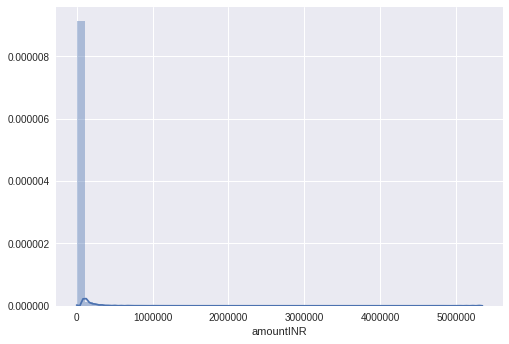

In [149]:
sns.distplot(h_all['amountINR'])

amountINR is highly left-skewed, as plotted. 
The vast majority of transactions are relatively small and only a tiny fraction of transactions comes even close to the maximum.


/home/shreemoyee/anaconda2/envs/py3k/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


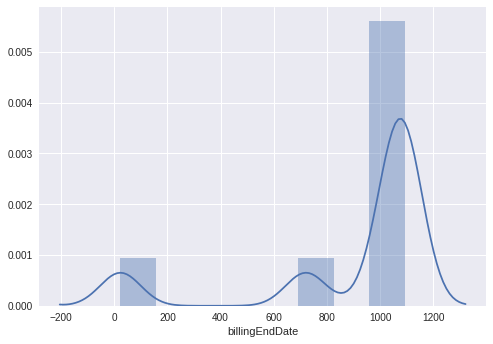

In [150]:
sns.distplot((stat.billingEndDate -np.min(stat.billingStartDate) ).dt.days.value_counts())

In [101]:
stat['purchase_pay_ratio'] = stat['pay']/stat['purchase']

In [102]:
stat['purchase_pay_ratio'] = stat['purchase_pay_ratio'].replace(np.Inf, np.nan)
stat['purchase_pay_ratio'] = stat['purchase_pay_ratio'].replace(-np.Inf, np.nan)
stat['purchase_pay_ratio'] = stat['purchase_pay_ratio'].fillna(np.nanpercentile(stat['purchase_pay_ratio'],75))

In [103]:
stat['all_'] = stat['over_pay']+stat['refund']

/home/shreemoyee/anaconda2/envs/py3k/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


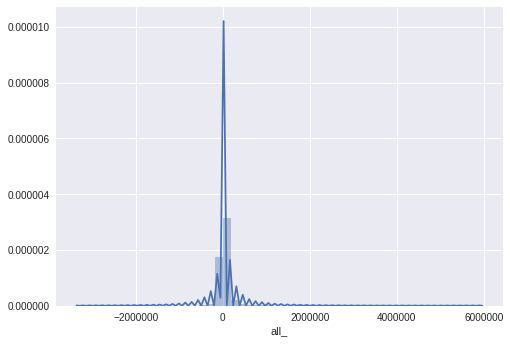

In [151]:
sns.distplot(stat['all_'])

The above shows that even though "amountINR" was highly skewed, the new feature created in normally distributed

In [105]:
dic=((stat.groupby('card Number')['pay'].max()-stat.groupby('card Number')['pay'].mean())>1e5).to_dict()
f['fraud_pay']=f['card number'].map(dic)

In [106]:
dic=(stat.groupby('card Number')['pay'].mean()).to_dict()
stat['mean'] = pd.Series()
stat['mean'] = stat['card Number'].map(dic)

In [108]:
def create_cols(data, cols):
    df = pd.DataFrame(columns = ['card number'])
    df['card number'] = pd.Series(data['card Number'].unique())
    ms = ['mean', 'max', 'std', 'min']
    for col in cols:
        for m in ms: 
            new_c = col+'_'+ m
            if(m=='mean'):
                df[new_c] = df['card number'].map((data.groupby(['card Number'])[col].mean()).to_dict())
            elif(m=='max'):
                df[new_c] = df['card number'].map((data.groupby(['card Number'])[col].max()).to_dict())
            elif(m=='std'):
                df[new_c] = df['card number'].map((data.groupby(['card Number'])[col].std()).to_dict())
            elif(m=='min'):
                df[new_c] = df['card number'].map((data.groupby(['card Number'])[col].min()).to_dict())
                    
    return df            
                    

In [109]:
cols = ['pay',  'purchase',  'refund', 'refund_no'
         ,'refund','over_pay', 'balance',
       'purchase_pay_ratio','all_']


In [110]:
f = create_cols(stat, cols)

In [152]:
f.head()

,card number,pay_mean,pay_max,pay_std,pay_min,purchase_mean,purchase_max,purchase_std,purchase_min,refund_mean,...,all__max,all__std,all__min,rk_wt_mean,rk_wt_max,rk_wt_min,fraud,fraud2,lab,fr
0,Card1,143444.338652,656932.481540,251807.046983,27198.53126,105852.430390,635114.582339,259284.442489,0.0,0.000000,...,656932.481540,391718.288320,-581449.344229,134500.132300,53665.23811,27198.53126,0.0,5.0,0,1.0
1,Card2,66036.666930,259033.671300,85933.236175,25282.69062,74510.287444,347074.153657,121032.029955,0.0,0.000000,...,31281.501030,38377.622729,-88040.482357,57456.728299,53665.23811,27198.53126,0.0,1.0,0,1.0
2,Card3,1402.545334,4712.402997,1910.329098,0.00000,38188.700604,124267.552053,45634.247881,0.0,0.000000,...,4712.402997,46092.343215,-122176.747301,3272.605779,53665.23811,27198.53126,0.0,2.0,0,0.0
3,Card4,80406.373792,175303.383710,69362.056999,0.00000,47721.251107,102030.677973,30757.937057,0.0,26342.565031,...,126970.595528,44316.017863,3092.854460,50987.999205,53665.23811,27198.53126,0.0,3.0,1,0.0
4,Card5,292947.768214,660042.173300,240172.639948,0.00000,125211.831989,286585.146435,89460.250366,0.0,0.000000,...,502584.522272,231354.665614,-106290.902135,229176.753840,53665.23811,27198.53126,0.0,4.0,0,3.0


In [111]:
p  = df[df['type_name']=='PAYMENT']

In [112]:
weighted_risk = p.groupby(['card number']).apply(lambda x : np.average(x.amountINR, weights = x['risk rating'])).to_dict()


In [113]:
f['rk_wt_mean'] = f['card number'].map(weighted_risk)


In [114]:
f['rk_wt_max'] = df['card number'].map((stat.groupby(['card Number'])['rk_wt'].max()).to_dict())
f['rk_wt_min'] = df['card number'].map((stat.groupby(['card Number'])['rk_wt'].min()).to_dict())


In [115]:
f['fraud'] =  f['card number'].map(dict_fraud)
f['fraud'] = f['fraud'].fillna(0)

In [130]:
f = f.fillna(0)

In [91]:
def z_scr(df):
    for c in df.columns:
        if c=='card number':
            continue
        if df[df[c]!=0].shape[0]== 0:
            print(c)
            df = df.drop([c], axis=1)
            continue
        df[c] = (df[c]-df[c].mean())/(df[c].std())

In [ ]:
dic2=stat[(stat['pay']-stat['mean'])>1e5].groupby('card Number').count()['all_'].to_dict()
f['fr']=f['card number'].map(dic2)

In [142]:
f['fr']=f['fr'].fillna(0)

In [ ]:
f2=f[['all__mean','rk_wt_mean','refund_mean','fraud','purchase_pay_ratio_mean','refund_no_max','refund_max']]
z_scr(f2)
f['lab']=f2['labels']

## Clustering data and visualization 

### CLUSTERING BY AGGREGATING FEATURES 

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)  
kmeans.fit(np.array(f2))
f2['labels']   = pd.Series(kmeans.labels_)

Y = kmeans.labels_
dict1 = {pd.Series(Y).value_counts().index[0]:0,
           pd.Series(Y).value_counts().index[1]:1,
           pd.Series(Y).value_counts().index[2]:2,pd.Series(Y).value_counts().index[3]:2
           }
f2['labels']=f2['labels'].map(dict1)

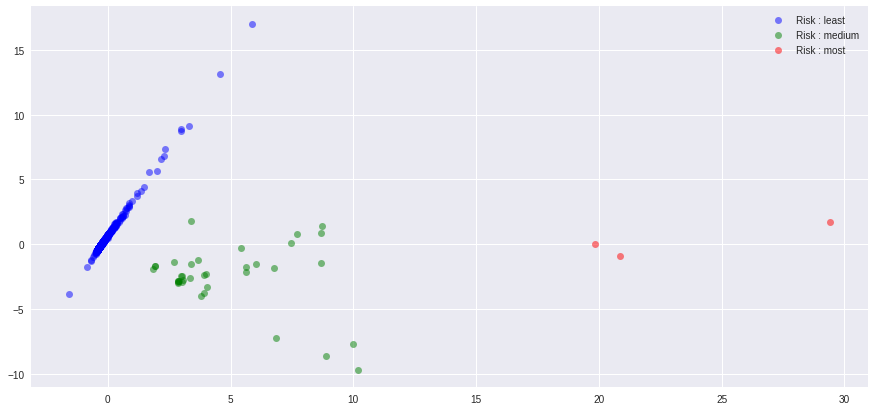

In [178]:
#Visualization by PCA
plt.figure(figsize=(15,7))
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(np.array(f2))
X_pca = pca.transform(np.array(f2))
plt.plot(X_pca[Y == 0, 0], X_pca[Y == 0, 1], 'bo', label='Risk : least', alpha=0.5)
plt.plot(X_pca[Y == 1, 0], X_pca[Y == 1, 1], 'go', label='Risk : medium', alpha=0.5)
plt.plot(X_pca[Y == 2, 0], X_pca[Y == 2, 1], 'ro', label='Risk : most', alpha=0.5)

plt.legend(loc=0);

In [156]:
stat.columns

Index(['card Number', 'billingStartDate', 'billingEndDate', 'paymentDueDate',
       'pay', 'purchase', 'refund', 'refund_no', 'rk_wt', 'rk_wt2', 'fraud',
       'over_pay', 'balance', 'purchase_pay_ratio', 'all_', 'fraud2', 'mean'],
      dtype='object')

## Month-wise data clustering and visualization

In [157]:
x = stat[['card Number','paymentDueDate','all_',  'purchase',  'refund', 'refund_no',
       'rk_wt', 'over_pay', 'balance', 'fraud']]

In [158]:
dn = pd.DataFrame(cards, columns =['card'])

In [159]:
mon = stat['paymentDueDate'].unique()
for m in mon:
    print(m)
    x1 = x[x['paymentDueDate']==m]
    x1 = x1[['all_',  'purchase',  'refund', 'refund_no',
       'rk_wt', 'over_pay', 'balance', 'fraud']]
    c = x[x['paymentDueDate']==m]['card Number']
    z_scr(x1)
    x1 = np.asarray(x1)
    kmeans.fit(x1)
    y = kmeans.labels_
    d = pd.DataFrame(columns=['card', 'lable'])
    d['card'] = c
    d['lable'] = y
    #print(d['lable'].value_counts())
    dict1 = {pd.Series(y).value_counts().index[0]:1,
            pd.Series(y).value_counts().index[1]:2,
            pd.Series(y).value_counts().index[2]:3,pd.Series(y).value_counts().index[3]:3
            }
    d['lable']=d['lable'].map(dict1)
    name = 'month_' + m
    dn[name] = dn['card'].map(dict(zip(d.card, d.lable))).fillna(0)
    
    print(d['lable'].value_counts())
    #print(d)
    #print(pd.Series(y).value_counts())
    

4/27/2014
1    1025
2      35
3      13
Name: lable, dtype: int64
5/27/2014
1    1060
3      15
2      13
Name: lable, dtype: int64
6/27/2014
1    1073
3      10
2      10
Name: lable, dtype: int64
7/27/2014
1    1034
2      43
3      16
Name: lable, dtype: int64
8/27/2014
1    1040
2      29
3       8
Name: lable, dtype: int64
9/27/2014
1    989
2     19
3      8
Name: lable, dtype: int64
3/27/2014
1    699
2     16
3      6
Name: lable, dtype: int64
10/25/2014
refund
refund_no
fraud
1    17
2     4
3     2
Name: lable, dtype: int64


In [160]:
cols=dn.columns.drop('card')
fin2=[]
fin3=[]
for i in range(dn.shape[0]):
    c2=0
    c3=0
    for c in cols:
        if dn.loc[i,c]==2:
            c2+=1;
        elif dn.loc[i,c]==3:
             c3+=1
    fin2.append(c2)
    fin3.append(c3)

dn['c2']=pd.Series(fin2)
dn['c3']=pd.Series(fin3)

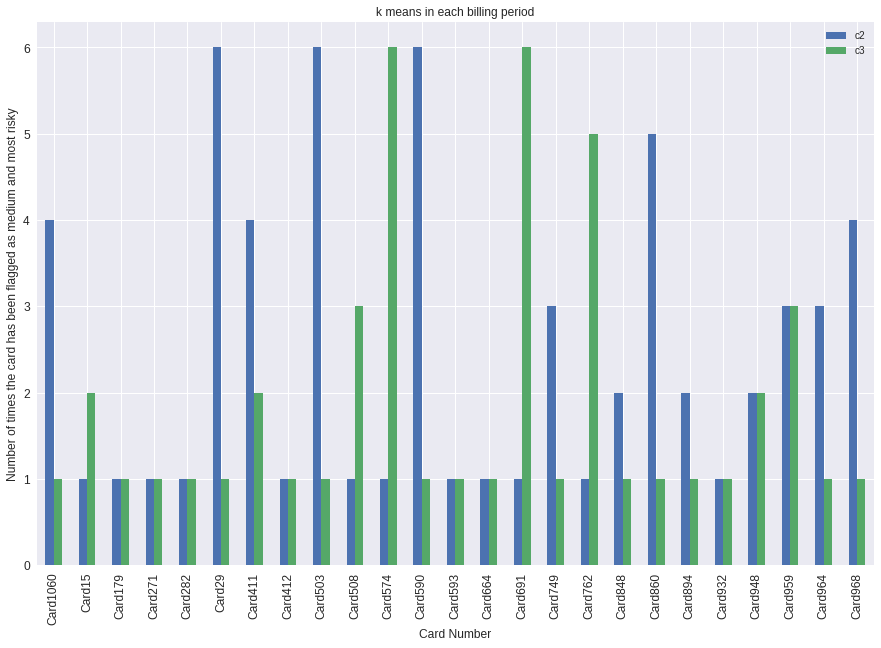

In [162]:
h = dn[(dn['c2']>0)&(dn['c3']>0)]
import matplotlib.pyplot as plt
ax = h[['c2','c3']].plot(kind='bar', title ="k means in each billing period", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Card Number", fontsize=12)
lab = h['card']
ax.set_xticklabels(lab, rotation=90)
ax.set_ylabel("Number of times the card has been flagged as medium and most risky", fontsize=12)
plt.show()

In [169]:
dn['card number'] = dn['card']

## WEIGHTED RANKING 

In [171]:
f = pd.merge(f, dn, on=['card number'])

In [175]:
cols=['all__mean','rk_wt_mean','refund_mean','fraud','purchase_pay_ratio_mean','refund_no_max','refund_max',
    'lab','c3']
#cols=cols.drop(['card number','labels'])
de = f[['card number']+ cols]
for i in cols:
    de[i]  = (de[i]-de[i].min())/(de[i].max()-de[i].min())
vals=np.array([1,1.25,1.5,2.25,1,1.75,1.5,1,-0.1,1])
#vals=np.array([1,1,1,3,1,1,1,1,0.5,1])
rank=pd.DataFrame(columns=['card number','vals'])
rank['card number']=de['card number']
rank['vals']=pd.Series(np.dot(de[cols],vals))

rank=rank.sort_values(by=['vals'], ascending = False)

rank.index=range(rank.shape[0])

/home/shreemoyee/anaconda2/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [176]:
rank['rank']= rank.index+1
rank = rank.drop('vals', 1)
rank = rank.sort_values(by = ['card number'])
rank.to_csv('/home/shreemoyee/Downloads/private-dataset/sub1.csv', index=False)

In [177]:
rank

,card number,rank
99,Card1,100
207,Card10,208
833,Card1000,834
860,Card1001,861
519,Card1002,520
959,Card1003,960
1048,Card1004,1049
720,Card1005,721
1049,Card1007,1050
88,Card1008,89
